# `problem statement`
##  <font color="red">Finding the `decision surface` of data which is created by opencv library  </font>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense,BatchNormalization
from keras.regularizers import L1,L2,L1L2
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
#  reading the csv file
df = pd.read_csv("my own dataset.csv")
df

,Unnamed: 0,0,1,2
0,0,33,37,1
1,1,50,36,1
2,2,58,36,1
3,3,68,35,1
4,4,86,32,1
...,...,...,...,...
84,84,176,140,1
85,85,143,170,1
86,86,139,71,0
87,87,80,64,0


In [10]:
# removing unwamted columns
df.drop("Unnamed: 0",inplace=True,axis=1)
df

,0,1,2
0,33,37,1
1,50,36,1
2,58,36,1
3,68,35,1
4,86,32,1
...,...,...,...
84,176,140,1
85,143,170,1
86,139,71,0
87,80,64,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       89 non-null     int64
 1   1       89 non-null     int64
 2   2       89 non-null     int64
dtypes: int64(3)
memory usage: 2.2 KB


In [12]:
# checking for the duplicate values in dataframe
df.duplicated().sum()

0

In [13]:
# removing duplicate values fronm the data frame
df.drop_duplicates(inplace=True)

In [14]:
# rechecking duplicates after deleting
df.duplicated().sum()

0

In [15]:
# checking the null values
df.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,89.0,126.955056,56.120591,22.0,80.0,133.0,172.0,231.0
1,89.0,109.460674,53.009660,32.0,72.0,99.0,134.0,214.0
2,89.0,0.561798,0.498978,0.0,0.0,1.0,1.0,1.0


# observations
- The mean and median both not at same ,so there may be outliers in the data

# <font color="purple"> Exploratory data analysis </font>

In [17]:
from scipy import stats

In [18]:
# boxplot and hist plot  kde plot
def uni_visual(df):
  for i in df:
    print("*"*15,i,"*"*15)
    sns.boxplot(x=i,data=df)
    plt.title(f"boxplot of{i}")
    plt.show()


    # histogram
    print("*"*15,i,"*"*15)
    df[i].plot(kind="hist")
    plt.title(f"histogram  of {i}")
    plt.show()


    # density plot
    print("*"*15,i,"*"*15)
    df[i].plot(kind="kde")
    plt.title(f"density plot of {i}")
    plt.show()

    # qq plot normal distribution
    print("*"*15,i,"*"*15)
    stats.probplot(df[i],dist="norm",plot=plt)
    plt.title(f"normal distribution of {i}")
    plt.grid()
    plt.show()

    # qq plot uniform distribution
    print("*"*15,i,"*"*15)
    stats.probplot(df[i],dist="uniform",plot=plt)
    plt.title(f"uniform distribution of {i}")
    plt.grid()
    plt.show()

    dec_ = df.describe()
    print("describe" ,dec_)


    skew_ = df.skew()
    print("skewness",skew_)

    kurt_ = df.kurt()
    print("skewness",kurt_)


*************** 0 ***************


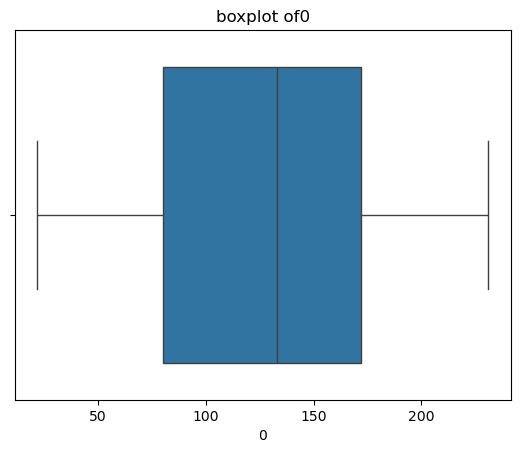

*************** 0 ***************


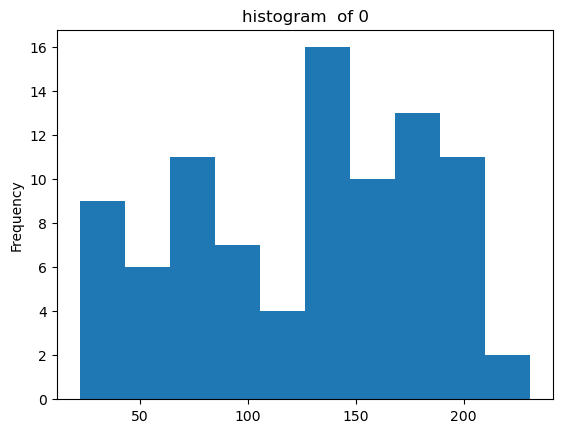

*************** 0 ***************


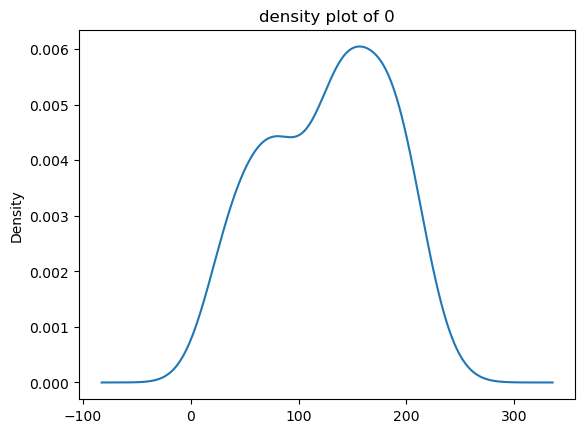

*************** 0 ***************


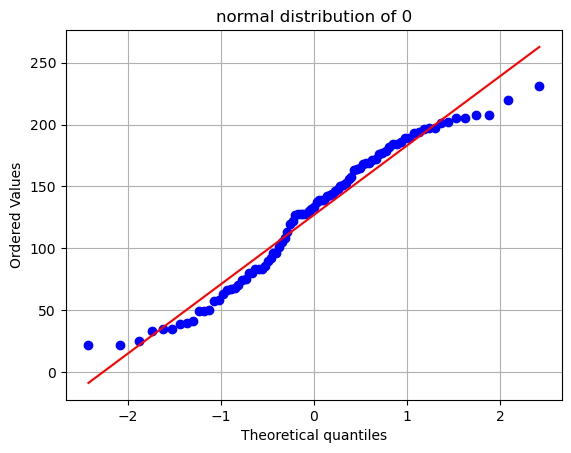

*************** 0 ***************


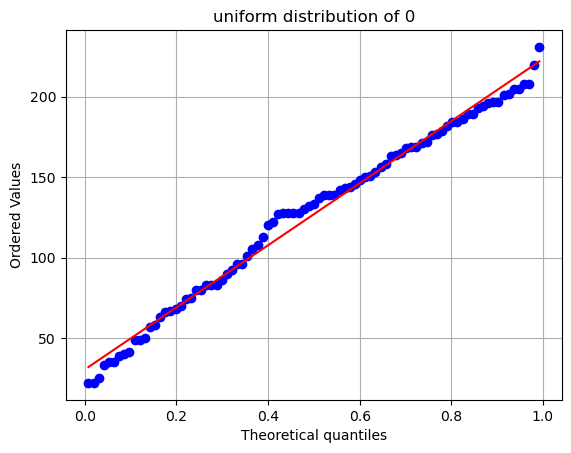

describe                 0           1          2
count   89.000000   89.000000  89.000000
mean   126.955056  109.460674   0.561798
std     56.120591   53.009660   0.498978
min     22.000000   32.000000   0.000000
25%     80.000000   72.000000   0.000000
50%    133.000000   99.000000   1.000000
75%    172.000000  134.000000   1.000000
max    231.000000  214.000000   1.000000
skewness 0   -0.212921
1    0.544397
2   -0.253392
dtype: float64
skewness 0   -1.079289
1   -0.560025
2   -1.980828
dtype: float64
*************** 1 ***************


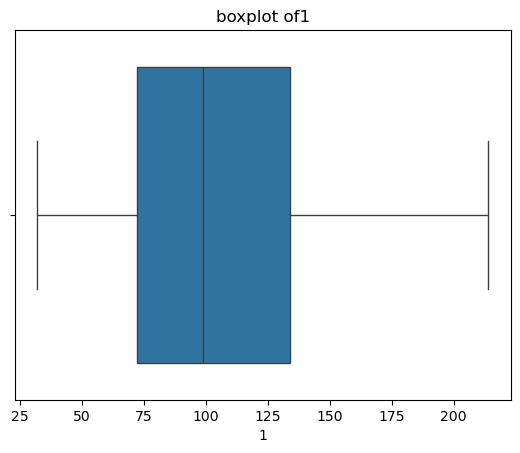

*************** 1 ***************


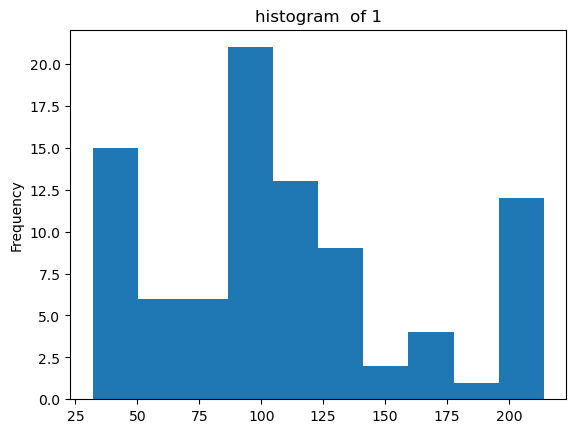

*************** 1 ***************


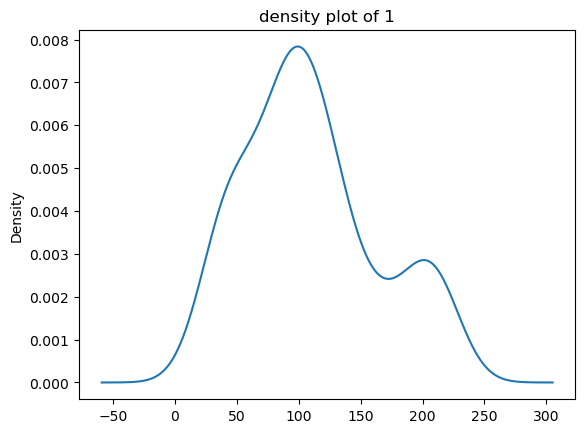

*************** 1 ***************


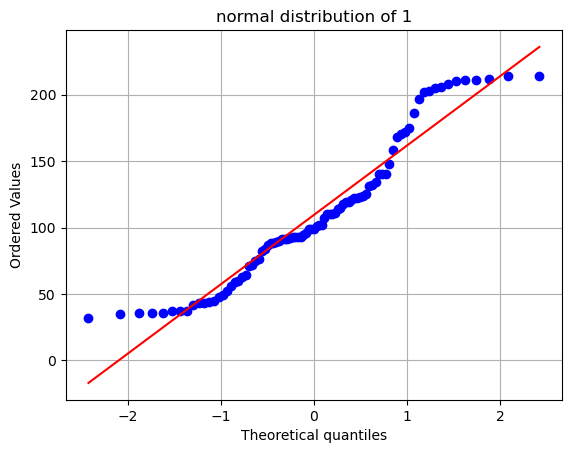

*************** 1 ***************


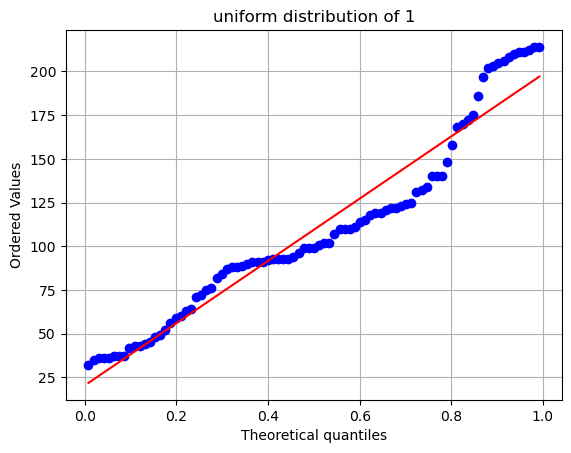

describe                 0           1          2
count   89.000000   89.000000  89.000000
mean   126.955056  109.460674   0.561798
std     56.120591   53.009660   0.498978
min     22.000000   32.000000   0.000000
25%     80.000000   72.000000   0.000000
50%    133.000000   99.000000   1.000000
75%    172.000000  134.000000   1.000000
max    231.000000  214.000000   1.000000
skewness 0   -0.212921
1    0.544397
2   -0.253392
dtype: float64
skewness 0   -1.079289
1   -0.560025
2   -1.980828
dtype: float64
*************** 2 ***************


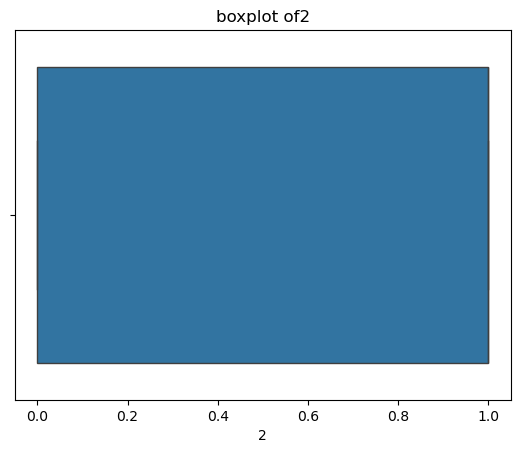

*************** 2 ***************


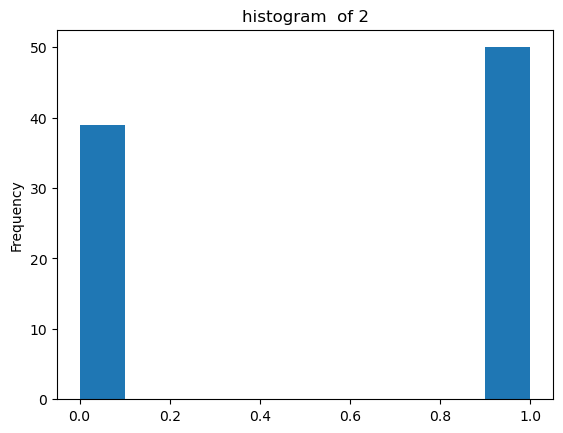

*************** 2 ***************


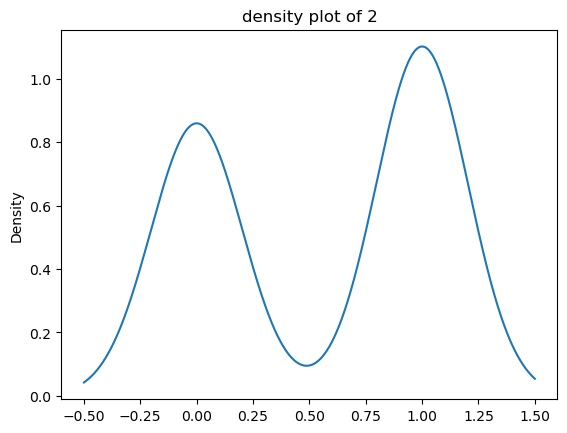

*************** 2 ***************


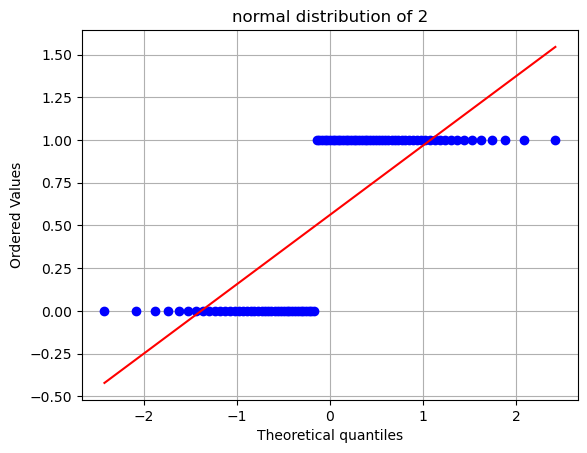

*************** 2 ***************


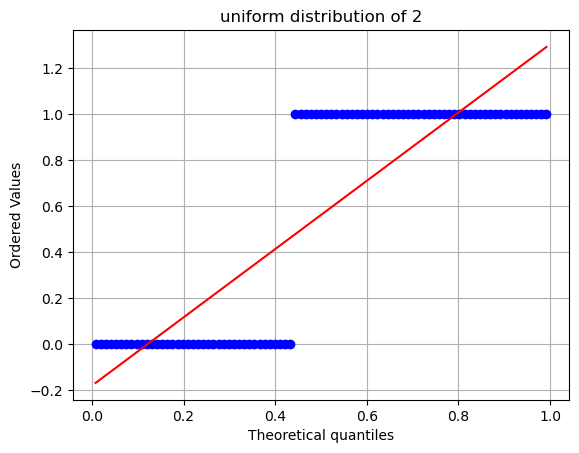

describe                 0           1          2
count   89.000000   89.000000  89.000000
mean   126.955056  109.460674   0.561798
std     56.120591   53.009660   0.498978
min     22.000000   32.000000   0.000000
25%     80.000000   72.000000   0.000000
50%    133.000000   99.000000   1.000000
75%    172.000000  134.000000   1.000000
max    231.000000  214.000000   1.000000
skewness 0   -0.212921
1    0.544397
2   -0.253392
dtype: float64
skewness 0   -1.079289
1   -0.560025
2   -1.980828
dtype: float64


In [19]:
uni_visual(df)

# observations
- There are no outliers in the data
- The 0 column has uniform distribution

# building the model for prediction

In [20]:
# identifing inputs and output
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [21]:
x

,0,1
0,33,37
1,50,36
2,58,36
3,68,35
4,86,32
...,...,...
84,176,140
85,143,170
86,139,71
87,80,64


In [22]:
# what are unique values in output feature
y.unique()

array([1, 0], dtype=int64)

In [23]:
# checking the classes frquency counts
y.value_counts()

2
1    50
0    39
Name: count, dtype: int64

# observation
- The data is slitely imbalanced but fine

In [24]:
# spliting the data train and test
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)

In [25]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(71, 2) (71,)
(18, 2) (18,)


In [26]:
x_test.shape

(18, 2)

In [27]:
# preprocessing of train data
std =StandardScaler()
x_train =std.fit_transform(x_train)


C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

In [28]:
# preprocessing of test data
x_test =std.transform(x_test)

C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [29]:
# creating the neural network
model = Sequential()
model.add(Dense(8,activation="tanh",use_bias=True,kernel_regularizer=L1(0.02),bias_regularizer=L1(0.02),input_dim=2))
model.add(Dense(6,activation="tanh",use_bias=True,kernel_regularizer=L1(0.02),bias_regularizer=L1(0.02)))

model.add(Dense(4,activation="tanh",use_bias=True,kernel_regularizer=L1(0.02),bias_regularizer=L1(0.02)))

model.add(Dense(1,activation="sigmoid",use_bias=True,kernel_regularizer=L1(0.02),bias_regularizer=L1(0.02)))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 111 (444.00 Byte)
Trainable params: 111 (444.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.get_weights()

[array([[ 0.27099025,  0.04324406, -0.35023066, -0.35713652, -0.18844807,
         -0.32878655,  0.34471095,  0.46683073],
        [-0.5187776 ,  0.63301325, -0.41455334, -0.63091815,  0.7089238 ,
         -0.43355396, -0.26163995, -0.3654125 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.41432738,  0.01498932, -0.05048007, -0.53088254, -0.1747747 ,
          0.12634808],
        [-0.40582448, -0.33011025, -0.3571253 ,  0.50881684, -0.19561362,
          0.49395847],
        [ 0.54151595,  0.04279727,  0.16679865, -0.5986881 ,  0.45051968,
          0.50675046],
        [-0.1680251 , -0.24525928, -0.5169796 , -0.38739938,  0.39247477,
          0.12050951],
        [ 0.413738  , -0.06087917,  0.3947258 ,  0.10313219,  0.40833485,
         -0.60837376],
        [-0.5055183 ,  0.42260206, -0.09407103,  0.30024248, -0.11089522,
         -0.461616  ],
        [-0.55731183, -0.38047823, -0.11614048,  0.27489775,  0.25218934,
         -0.04825807],
 

In [32]:
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.01),metrics=["accuracy"])
History=model.fit(x_train,y_train,batch_size=10,validation_split=0.1,epochs=20)

Epoch 1/20
7/7 [==============================] - 6s 112ms/step - loss: 1.4434 - accuracy: 0.4762 - val_loss: 1.3067 - val_accuracy: 0.7500
Epoch 2/20
7/7 [==============================] - 0s 16ms/step - loss: 1.3869 - accuracy: 0.6349 - val_loss: 1.2819 - val_accuracy: 0.8750
Epoch 3/20
7/7 [==============================] - 0s 16ms/step - loss: 1.3365 - accuracy: 0.7302 - val_loss: 1.2631 - val_accuracy: 1.0000
Epoch 4/20
7/7 [==============================] - 0s 15ms/step - loss: 1.2927 - accuracy: 0.7937 - val_loss: 1.2449 - val_accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 0s 15ms/step - loss: 1.2566 - accuracy: 0.8254 - val_loss: 1.2232 - val_accuracy: 0.8750
Epoch 6/20
7/7 [==============================] - 0s 15ms/step - loss: 1.2266 - accuracy: 0.8571 - val_loss: 1.2126 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 0s 16ms/step - loss: 1.2013 - accuracy: 0.9048 - val_loss: 1.1903 - val_accuracy: 0.8750
Epoch 8/20
7/7 [==========

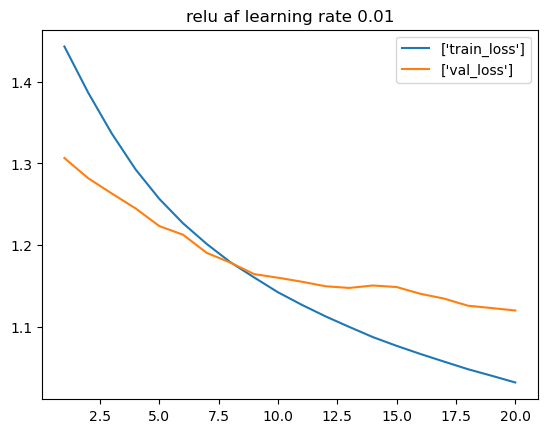

In [33]:
plt.plot(range(1,21),History.history["loss"],label=["train_loss"])
plt.plot(range(1,21),History.history["val_loss"],label=["val_loss"])
plt.title("relu af learning rate 0.01")
plt.legend()
plt.show()

In [34]:
History.history['loss']

[1.4433929920196533,
 1.3869473934173584,
 1.3365179300308228,
 1.2927299737930298,
 1.2565854787826538,
 1.2266266345977783,
 1.2012749910354614,
 1.1788371801376343,
 1.1601991653442383,
 1.1421033143997192,
 1.1268069744110107,
 1.112617015838623,
 1.099688172340393,
 1.087141513824463,
 1.0764328241348267,
 1.0664892196655273,
 1.0570998191833496,
 1.0478435754776,
 1.0398249626159668,
 1.0315355062484741]

In [35]:
# predictons of test data
pred_x_p =model.predict(x_test)

1/1 [==============================] - 0s 251ms/step


In [36]:
pred_x_p # these are probalities

array([[0.32626793],
       [0.21936005],
       [0.8492134 ],
       [0.867172  ],
       [0.86101246],
       [0.5866509 ],
       [0.38762638],
       [0.7819765 ],
       [0.8731617 ],
       [0.80992484],
       [0.8427838 ],
       [0.8342128 ],
       [0.34345037],
       [0.42343774],
       [0.19396363],
       [0.18843517],
       [0.74133635],
       [0.37887794]], dtype=float32)

In [37]:
y_test_pred = np.where(pred_x_p>=0.5,1,0)

In [38]:
y_test_pred

array([[0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [39]:
# importing evalution metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#print("accuary of twst data ",accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.90      0.90      0.90        10

    accuracy                           0.89        18
   macro avg       0.89      0.89      0.89        18
weighted avg       0.89      0.89      0.89        18



C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HAREESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

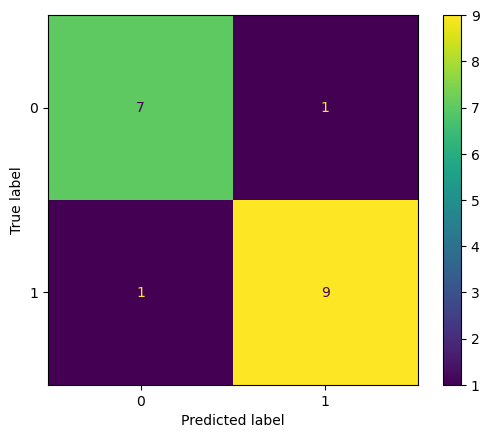

In [41]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
cm =confusion_matrix(y_test,y_test_pred)
p =ConfusionMatrixDisplay(cm)
p.plot()
plt.show()

In [45]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 29s 3ms/step


<AxesSubplot:>

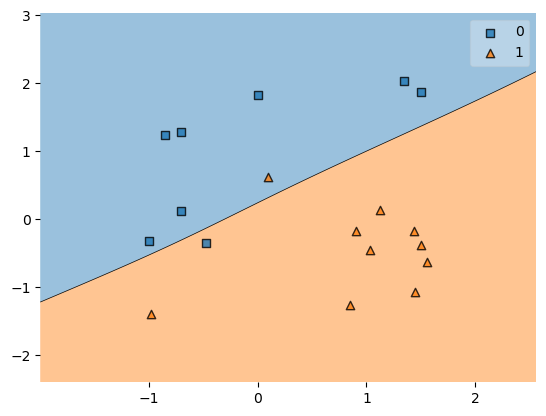

In [46]:
plot_decision_regions(x_test,y_test.values,clf=model)